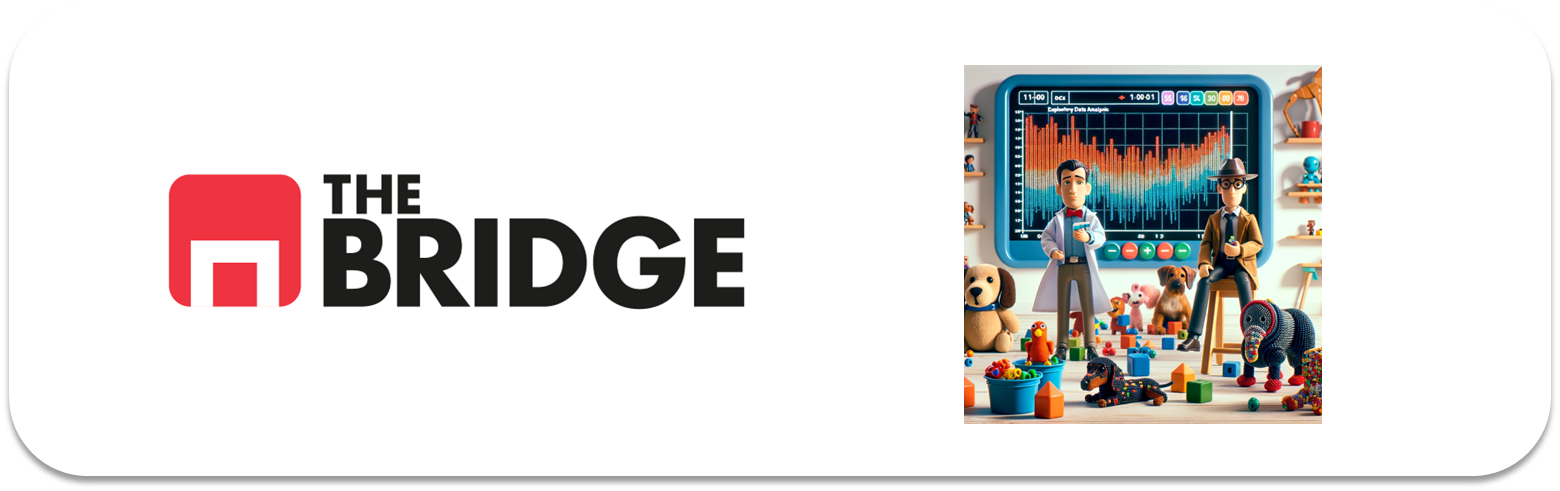

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_categorical_relationship_fin,plot_combined_graphs,plot_grouped_histograms


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [26]:
df = pd.read_csv("./titanic.csv")

In [68]:
df.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,Family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [31]:
df.drop(columns=["deck", "survived", "pclass", "embarked"],axis =1,inplace= True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [33]:
df['Family_members'] = df['parch'] + df['sibsp']
df.drop(columns=["parch", "sibsp"],axis =1,inplace= True)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [41]:
df['embark_town'].value_counts(dropna=False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

In [43]:
df.loc[df['embark_town'].isna()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,Family_members
61,female,38.0,80.0,First,woman,False,NaN,yes,True,0
829,female,62.0,80.0,First,woman,False,NaN,yes,True,0


In [55]:
df.loc[df['embark_town'].isna(),'embark_town'] = df['embark_town'].mode().values[0]


In [57]:
df['embark_town'].value_counts(dropna=False) #compruebo que efectivamente no hay mas NaN

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [61]:
df.loc[df['age'].isna(),'age']=df['age'].mode().values[0]

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?




In [72]:
#Frecuencias absolutas
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

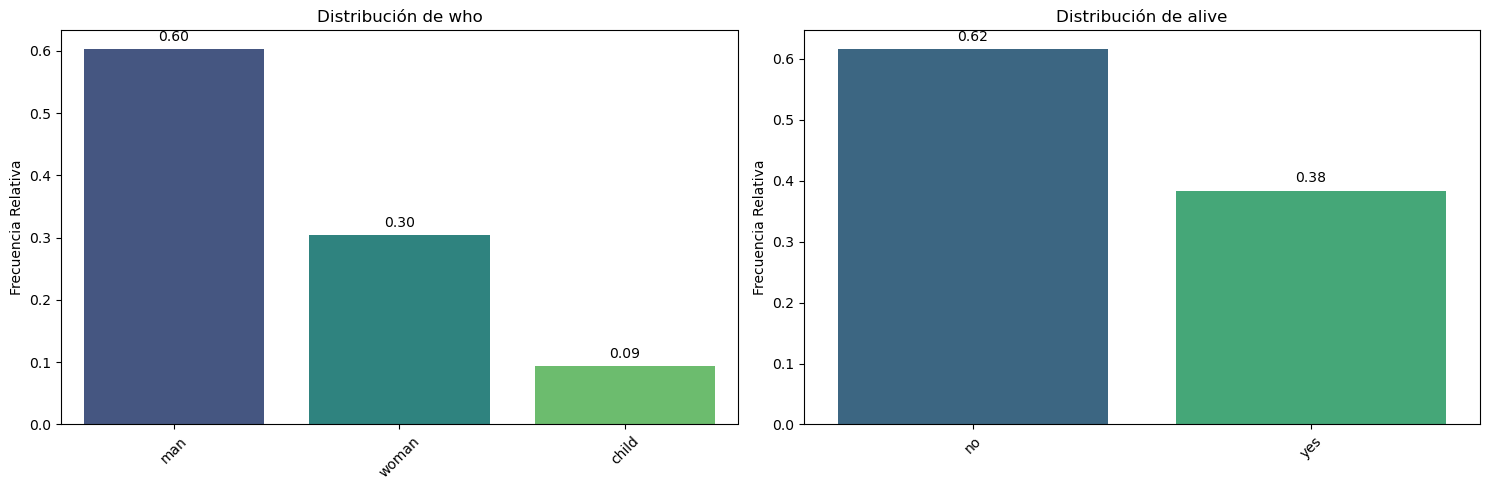

In [70]:
#Comparo sus frecuencias relativas
pinta_distribucion_categoricas(df,['who','alive'], relativa = True, mostrar_valores = True)

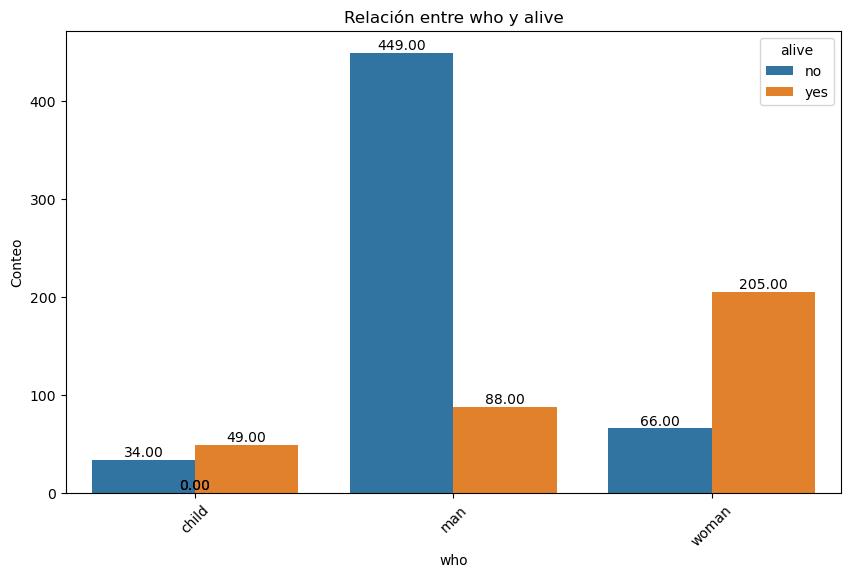

In [76]:
plot_categorical_relationship_fin(df,'who','alive',show_values = True) #Relacion absoluta entre who (man, woman or child) y alive (yes,no)

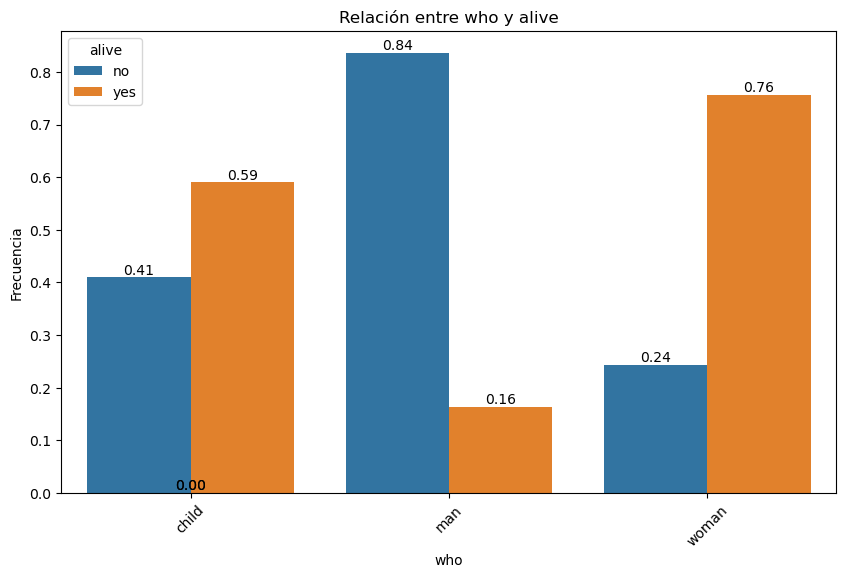

In [79]:
plot_categorical_relationship_fin(df,'who','alive',relative_freq = True,show_values = True)

Se ve que sobrevivieron menos hombres y mas mujeres en primer lugar, en terminos relativos  

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?


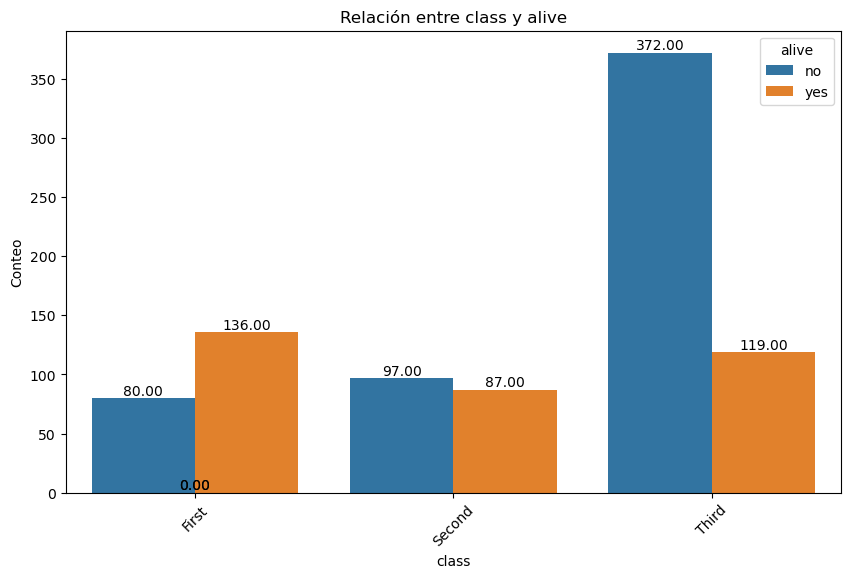

In [84]:
#Test chi cuadrado 
plot_categorical_relationship_fin(df,'class','alive',show_values=True) #terminos absolutos

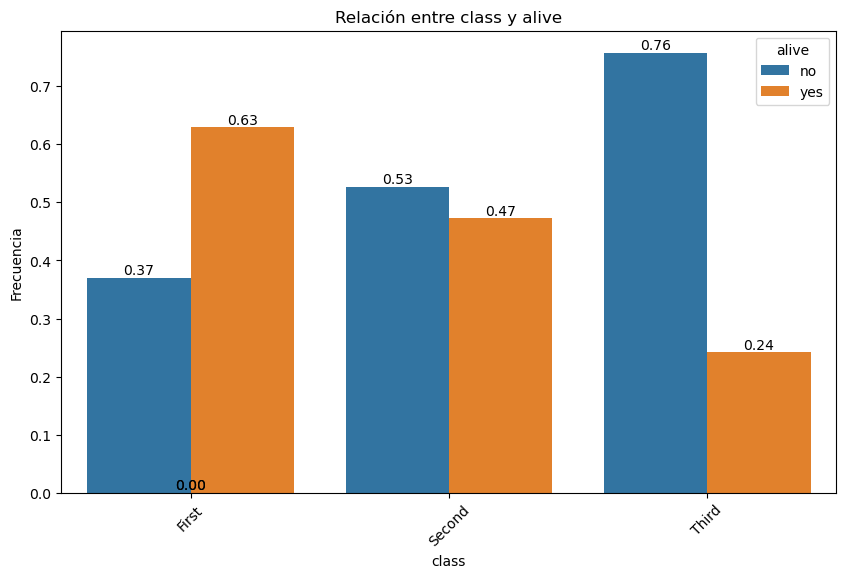

In [135]:
plot_categorical_relationship_fin(df,'class','alive',relative_freq = True, show_values=True) #terminos relativos

In [88]:
#1 Obtengo la tabla de contingencia 
tabla_contingencia = pd.crosstab(df['class'],df['alive'])
tabla_contingencia

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [137]:
#2 Aplico la prueba
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado: ", chi2)
print("Valor P-value: ", p)
print("Valor Grados de libertad: ", dof)
print("Tabla de frecuencias esperadas: \n", expected)

Valor Chi-Cuadrado:  25.964452881874784
Valor P-value:  2.3008626481449577e-06
Valor Grados de libertad:  2
Tabla de frecuencias esperadas: 
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


##### 3 Interpretacion de resultados 
H0: **No** existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia  
H1: Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia

como P < 0.05 rechazo H0 y digo que si existe relacion estadisticamente significativa entr las 2 variables.


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?


In [140]:
#Frecuencias absolutas
df['embark_town'].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

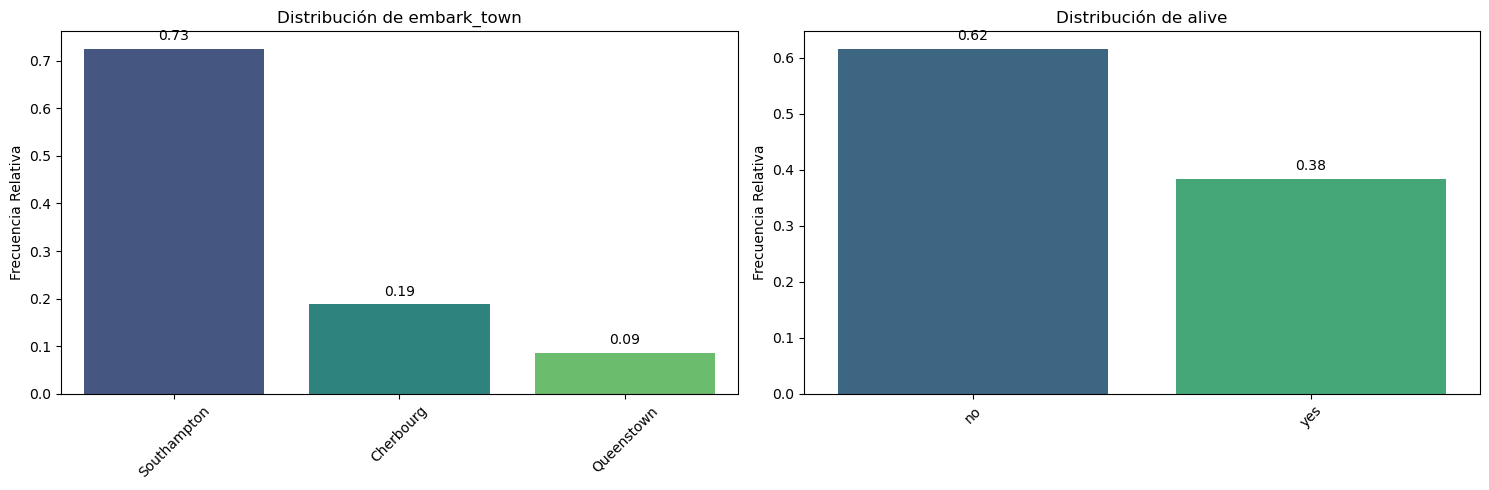

In [105]:
#Comparo sus frecuencias relativas
pinta_distribucion_categoricas(df,['embark_town','alive'], relativa = True, mostrar_valores = True)


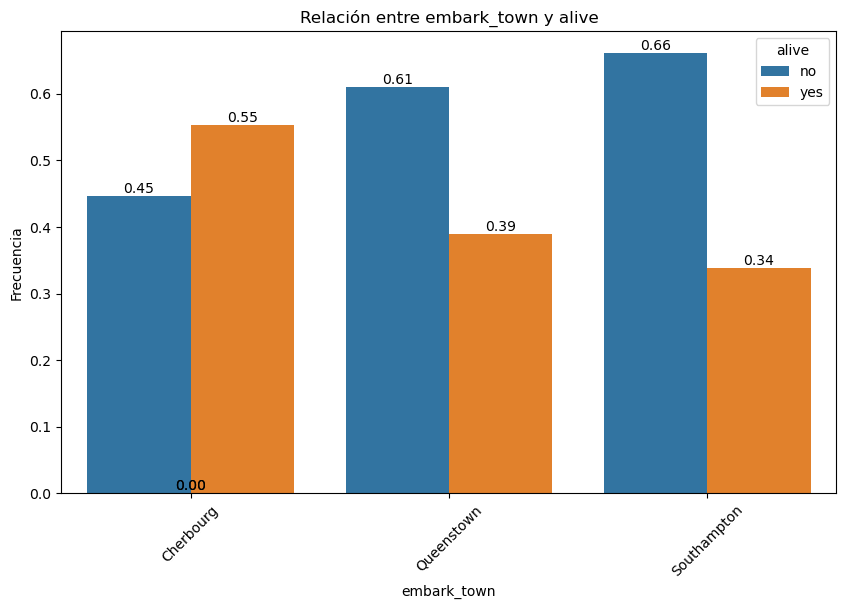

In [133]:
plot_categorical_relationship_fin(df,'embark_town','alive',relative_freq = True, show_values=True) #terminos relativos

In [127]:
#1 Obtengo la tabla de contingencia 
tabla_contingencia2 = pd.crosstab(df['embark_town'],df['alive'])
tabla_contingencia2

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [129]:
#2 Aplico la prueba
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia2)
print("Valor Chi-Cuadrado: ", chi2)
print("Valor P-value: ", p)
print("Valor Grados de libertad: ", dof)
print("Tabla de frecuencias esperadas: \n", expected)

Valor Chi-Cuadrado:  25.964452881874784
Valor P-value:  2.3008626481449577e-06
Valor Grados de libertad:  2
Tabla de frecuencias esperadas: 
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


##### 3 Interpretacion de resultados 
H0: **No** existe alguna relación estadísticamente significativa entre la ciudad en la que se embarco y la supervivencia  
H1: Existe alguna relación estadísticamente significativa entre la ciudad en la que se embarco y la supervivencia

Existe suficiente evidencia estadística para rechazar la hipótesis nula (H0). Esto implica que sí hay una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


In [145]:
#1 Obtengo la tabla de contingencia 
tabla_contingencia3 = pd.crosstab(df['fare'],df['alive'])
tabla_contingencia3

alive,no,yes
fare,,
0.0000,14,1
4.0125,1,0
5.0000,1,0
6.2375,1,0
6.4375,1,0
...,...,...
227.5250,1,3
247.5208,1,1
262.3750,0,2


In [ ]:
#2 Aplico la prueba
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(tabla_contingencia3)
print("Valor Chi-Cuadrado: ", chi2)
print("Valor P-value: ", p)
print("Valor Grados de libertad: ", dof)
print("Tabla de frecuencias esperadas: \n", expected)

##### 3 Interpretacion de resultados 
H0: **No** existe alguna relación estadísticamente significativa entre el precio de la tarifa que se pago y la supervivencia  
H1: Existe alguna relación estadísticamente significativa entre el precio de la tarifa que se pago y la supervivencia

Existe suficiente evidencia estadística para rechazar la hipótesis nula (H0). Esto implica que sí hay una relación estadísticamente significativa entre el precio que se pago por el viaje y la supervivencia.


5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

Pasajeros que no pagaron billete:
- Tripulacion
- Miembros invitados de cortesia
- Errores en los datos
- Pasajeros con billetes pagados por otros
Para saber que paso con el pasajero que pago mas por el billete:

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.